# Modul 7 Praktikum Sains Data: Pengantar TensorFlow & Keras

Kembali ke [Sains Data](./saindat2024genap.qmd)

Sekarang kita sudah masuk ke materi *artificial neural network* (ANN) atau biasa disebut *neural network* (NN), yang mendasari dunia *deep learning*.

Saat modul praktikum ini disusun (April 2024), ada dua *framework* utama untuk *deep learning* di Python, yaitu:

1. TensorFlow: <https://www.tensorflow.org/>

    (dan Keras di dalamnya: <https://keras.io/>)

2. PyTorch: <https://pytorch.org/>

Kedua *framework* ini bersaing. Umumnya, TensorFlow lebih sering digunakan di industri, sedangkan PyTorch lebih sering digunakan dalam riset/penelitian.

Di pertemuan kali ini, kita akan membahas TensorFlow, baik penggunaannya secara sendiri (*pure TensorFlow*, yaitu tanpa Keras) maupun dengan bantuan Keras. Kalau belum punya, instal terlebih dahulu:

In [ ]:
pip install tensorflow

Keras terinstal bersama TensorFlow (karena Keras ada di dalamnya).

Lalu import:

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Pengantar *Neural Network*

*Overview:*

- Secara umum, suatu *neural network* terdiri dari sejumlah *layer* atau lapisan (minimal dua).

- *Layer* pertama disebut *input layer*, dan *layer* terakhir disebut *output layer*.

- Tiap *layer* terdiri dari sejumlah *neuron*, yang masing-masing bisa menyimpan suatu nilai.

- Kecuali *input layer*, tiap *neuron* terhubung dengan sejumlah *neuron* di *layer* sebelumnya.

- Tiap sambungan terdiri dari nilai *weight* (sebagai pengali), nilai *bias* (sebagai pergeseran), dan suatu "fungsi aktivasi" yang menghasilkan nilai untuk *neuron* tujuan.

- *Weight* maupun *bias* disebut **parameter** dari *neural network*.

- Proses *training* adalah terus-menerus memperbarui parameter hingga hasil prediksi *neural network* sudah cukup baik, dengan meminimumkan suatu ***loss function*** atau fungsi objektif (yang intinya menghitung *error*).

- Suatu *neural network* bisa memiliki sejumlah *layer*, masing-masing dengan banyaknya *neuron* tertentu dan fungsi-fungsi aktivasi tertentu. Hal-hal itu disebut 
***hyperparameter*** dari *neural network*. Suatu **arsitektur** adalah suatu pilihan/konfigurasi *hyperparameter*.

### SLP: *(Single-Layer) Perceptron*

ANN paling pertama adalah *perceptron* (juga disebut SLP atau *single-layer perceptron*) yang dirancang oleh Frank Rosenblatt pada tahun 1957 (Géron, 2019). Ini adalah *neural network* yang paling sederhana, bahkan ini bisa disebut *building block* dari semua ANN (apabila diberi kebebasan untuk modifikasi). Konsep dasar *neural network* bisa kita pelajari di sini.

![](./gambar/aggarwal_nndl_hal5.png)

Sumber gambar: Aggarwal (2018) hal. 5

*Perceptron* hanya terdiri dari satu *input layer* dan satu *output layer*. Bahkan, aslinya hanya ada satu *neuron* di *output layer*.

Apabila dibutuhkan lebih dari satu *neuron* di *output layer*, itu bisa dianggap menggunakan lebih dari satu *perceptron* (yaitu menggunakan banyaknya *perceptron* sesuai banyaknya *neuron* di *output layer*), yang saling "ditumpuk":

![](./gambar/goodfellow_dl_hal337_crop.png)

Sumber gambar: Goodfellow, et. al. (2016) hal. 337

Aslinya, fungsi aktivasi yang digunakan oleh *perceptron* adalah *Heaviside step function* $H(v)$ yang mungkin kalian kenal dari mata kuliah PDB, atau juga disebut *threshold activation function*:

$$H(v) = \begin{cases}
    1, & v \ge 0 \\
    0, & v < 0
\end{cases}$$

Sehingga, untuk *output neuron* ke-$j$ yang disambung dari $n$ *input neuron*, model *perceptron* bisa dirumuskan sebagai berikut:

$$y_j = H\left(\left(\sum_{i=1}^{n} w_{ij} x_i \right) + b_j\right)$$

dengan

- $x_i$ adalah nilai pada *input neuron* ke-$i$

- $y_j$ adalah nilai pada *output neuron* ke-$j$

- $w_{ij}$ adalah parameter *weight* untuk sambungan *input neuron* ke-$i$ menuju *output neuron* ke-$j$

- $b_j$ adalah parameter *bias* untuk *output neuron* ke-$j$

Lebih umumnya,

$$y_j = \Phi\left(\left(\sum_{i=1}^{n} w_{ij} x_i \right) + b_j\right)$$

dengan $\Phi(v)$ adalah sembarang fungsi aktivasi.

*Note:* seperti di gambar, sebenarnya *bias* juga bisa dianggap *neuron* istimewa yang nilai $x_i$ nya selalu satu.

Biasanya, semua nilai di *layer* selanjutnya dihitung secara sekaligus menggunakan perkalian matriks, dengan perumusan:

$$\textbf{y} = \Phi\left(\textbf{w}^T \textbf{x} + \textbf{b}\right)$$

dengan $\textbf{x} = [x_i]$, $\textbf{y} = [y_j]$, dan $\textbf{b} = [b_j]$ adalah vektor kolom, serta $\textbf{w} = \left[w_{ij}\right]$ adalah matriks.

### MLP: *Multilayer Perceptron*

Konsep *single-layer perceptron* bisa diperumum menjadi *multilayer perceptron* atau *neural network* yang biasa kita kenal, dengan menambahkan beberapa *layer* di antara *input layer* dan *output layer*. Semua *layer* selain *input layer* dan *output layer* disebut *hidden layer*.

![](./gambar/aggarwal_nndl_hal18.png)

Sumber gambar: Aggarwal (2018) hal. 18

Konsep perhitungan antara tiap *layer* tetap sama, yaitu

$$\textbf{y} = \Phi\left(\textbf{w}^T \textbf{x} + \textbf{b}\right)$$

### Fungsi Aktivasi

![](./gambar/aggarwal_nndl_hal13.png)

Sumber gambar: Aggarwal (2018) hal. 13

Beberapa fungsi aktivasi adalah (Aggarwal, 2018, hal. 12-13):

a. "Linier" atau identitas

$$\Phi(v) = v$$

b. *Sign* (fungsi tanda): $\text{sign}(v)$ atau $\text{sgn}(v)$

$$
\Phi(v) = \text{sign}(v) = \begin{cases}
    1, & v > 0 \\
    0, & v = 0 \\
    -1, & v < 0
\end{cases}
$$

c. Sigmoid, terkadang dilambangkan $\sigma(v)$ dan terkadang disebut fungsi aktivasi logistik

$$\Phi(v) = \frac{1}{1 + e^{-v}}$$

d. *(Soft)* tanh: $\tanh(v)$

$$\Phi(v) = \frac{e^{2v} - 1}{e^{2v} + 1} = 2 * \text{sigmoid}(2v) - 1$$

e. *Rectified Linear Unit* (ReLU)

$$\Phi(v) = \max\{v, 0\}$$

f. *Hard tanh*

$$\Phi(v) = \max\{\min\{v, 1\}, -1\}$$

Fungsi aktivasi yang paling sering digunakan adalah ReLU, kecuali untuk *output layer*.

Untuk *output layer*, biasanya,

- untuk regresi, banyaknya *neuron* sesuai banyaknya nilai prediksi (umumnya hanya satu), dan digunakan fungsi aktivasi linier

- untuk klasifikasi *multiclass* (lebih dari dua kelas), biasanya banyaknya *output neuron* sesuai banyaknya kelas, dan digunakan fungsi aktivasi ***softmax*** sebagai berikut, agar *output* berupa peluang tiap kelas:

$$\Phi(\overline{v})_i = \frac{\exp(v_i)}{\sum_{j=1}^k \exp(v_j)}$$

- untuk klasifikasi biner, hanya ada satu *neuron* di *output layer*, dan digunakan fungsi aktivasi *sigmoid*. (Keberadaan hanya satu *output neuron* lebih hemat daripada menggunakan dua *output neuron*)

### *Loss function*

Misalkan $y_i$ adalah nilai sebenarnya dan $\hat{y}_i$ adalah hasil prediksi.

Untuk regresi, biasa digunakan MSE *(mean squared error)*, juga disebut *L2 loss*:

$$\text{MSE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2$$

Untuk klasifikasi, biasa digunakan yang namanya *cross-entropy loss*, juga disebut *logistic loss* atau *log loss*:

$$L_{\text{log}}(y,\hat{y}) = -(y \ln (\hat{y}) + (1 - y) \ln (1 - \hat{y}))$$

### Proses *training*

Proses *training* untuk *neural network* dilakukan secara iteratif, yaitu tiap iterasi akan memperbarui parameter sehingga nilai *loss function* menjadi lebih kecil.

Tiap iterasi melakukan langkah-langkah berikut untuk tiap data *training*:

1. *Forward pass*: menghitung nilai *output* akhir, yaitu $\hat{y}$ (hasil prediksi), berdasarkan *input* data *training*.

2. Menghitung *loss* antara $y$ (nilai asli) dan $\hat{y}$

3. *Backpropagation*: menghitung gradien dari *loss* terhadap tiap parameter, secara "mundur"

4. *Update optimizer*: menggunakan algoritma *optimizer* seperti *gradient descent* untuk memperbarui parameter-parameter (*weights and biases*) berdasarkan gradien dari *loss*

    Note: ada banyak *optimizer*, seperti *gradient descent*, SGD (*stochastic gradient descent*), dan *Adam* (*adaptive moment estimation*). Pilihan *optimizer* (serta parameter-parameter yang bisa diatur untuk *optimizer*, seperti *learning rate*) juga menjadi *hyperparameter* untuk *neural network*.

Note: istilah *backward pass* meliputi langkah *backpropagation* dan *update optimizer*.

Apabila data *training* sangat banyak, terkadang data *training* tersebut dibagi menjadi beberapa *batch*, dan tiap iterasi menggunakan *batch* yang berbeda. Apabila semua *batch* sudah diproses, sebutannya adalah satu ***epoch***. Sehingga, satu *epoch* terdiri dari sejumlah iterasi sesuai banyaknya *batch*.

(Apabila data *training* tidak dibagi menjadi *batch*, maka satu *epoch* sama dengan satu iterasi.)

### *Train-Validation-Test Split*

Ketika menggunakan metode *machine learning* yang di-*training* secara iteratif, seperti *neural network*, biasanya ada juga yang namanya *validation data*. Sehingga, di awal, *dataset* dipisah menjadi data *train*, data *validation*, dan data *test*.

Gunanya, kita bisa menguji akurasi model di akhir tiap *epoch*, menggunakan data *validation* daripada data *test*.

Rasio yang paling sering digunakan adalah 80-10-10, yaitu 80% data *train*, 10% data *validation*, dan 10% data *test*.

Apabila menggunakan scikit-learn, untuk melakukan *train-validation-test split*, caranya adalah dengan *split* dua kali, yaitu

1. *Split* menjadi data "train" dan data *test*

2. Data "train" itu di-*split* lagi menjadi data *train* sesungguhnya dan data *validation*

atau bisa juga

1. *Split* menjadi data *train* dan data "test"

2. Data "test" itu di-*split* lagi menjadi data *validation* dan data *test* sesungguhnya

## *(Pure)* TensorFlow

In [ ]:
import tensorflow as tf

### *Tensor*, Konstanta, Variabel

*Tensor* adalah semacam perumuman dari *array*/vektor ataupun *matriks*.

- Skalar (bilangan) adalah *tensor* berdimensi nol (atau *rank* nol).

- *Array* atau vektor adalah *tensor* berdimensi satu (atau *rank* satu).

- Matriks adalah *tensor* berdimensi dua (atau *rank* dua).

- Istilah *"tensor"* biasanya merujuk pada *tensor* berdimensi tiga (atau *rank* tiga), yaitu semacam matriks tapi tiga dimensi, sehingga ada baris, kolom, dan satu dimensi lagi.

Fitur *tensor* di TensorFlow mirip dengan fitur *array* di numpy, yang memang juga bisa multidimensi.

In [10]:
x = tf.zeros(shape = (3,4))
print(x)

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)


In [9]:
x = tf.ones(shape = (3,4))
print(x)

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


Untuk menentukan *array* kita sendiri, di numpy digunakan `numpy.array`.

Untuk menentukan *tensor* kita sendiri, di TensorFlow digunakan `tensorflow.constant` (agar nilainya tidak bisa diubah) atau `tensorflow.Variable` (nilainya bisa diubah).

Pada umumnya (apabila tidak ada keterangan), *tensor* di TensorFlow berupa `tensorflow.constant`

In [25]:
const0 = tf.constant(1.5)
print(const0)

tf.Tensor(1.5, shape=(), dtype=float32)


In [26]:
print(tf.rank(const0))

tf.Tensor(0, shape=(), dtype=int32)


In [27]:
const1 = tf.constant([2.31, 4.567, 8.9])
print(const1)

tf.Tensor([2.31  4.567 8.9  ], shape=(3,), dtype=float32)


In [28]:
print(tf.rank(const1))

tf.Tensor(1, shape=(), dtype=int32)


In [31]:
const1[0] = 52.5

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [29]:
const2 = tf.constant([
    [1, 2.718, 3.14],
    [4, 5, 6.28]
])
print(const2)

tf.Tensor(
[[1.    2.718 3.14 ]
 [4.    5.    6.28 ]], shape=(2, 3), dtype=float32)


In [30]:
print(tf.rank(const2))

tf.Tensor(2, shape=(), dtype=int32)


In [37]:
v = tf.Variable(initial_value = tf.zeros(shape = (2,3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>


*Assignment* untuk variabel di TensorFlow dilakukan dengan `.assign`

In [49]:
v.assign(tf.ones(shape = (2,3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


In [50]:
v[0, 0].assign(9)
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[9., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


Ada juga `.assign_add`, sama saja dengan `+=`

In [51]:
v.assign_add(tf.ones(shape = (2,3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[10.,  2.,  2.],
       [ 2.,  2.,  2.]], dtype=float32)>


Kita bisa membuat *tensor* dengan nilai yang *random*, misalnya dari distribusi normal atau dari distribusi uniform

In [76]:
# dari distribusi normal
x = tf.random.normal(shape = (2,3), mean = 0, stddev = 1)
print(x)

tf.Tensor(
[[ 1.2542483  -0.41693744  1.0116149 ]
 [-1.4155766   0.17204648 -0.6892854 ]], shape=(2, 3), dtype=float32)


In [77]:
# dari distribusi uniform
x = tf.random.uniform(shape = (2,3), minval = 0, maxval = 1)
print(x)

tf.Tensor(
[[0.51321495 0.26164746 0.09113109]
 [0.81229377 0.67134035 0.36057925]], shape=(2, 3), dtype=float32)


Operasi di TensorFlow mirip dengan numpy

In [56]:
a = 4 * tf.ones((2, 2))
print(a)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [57]:
b = tf.square(a)
print(b)

tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)


In [58]:
c = tf.sqrt(a)
print(c)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [59]:
d = b + c
print(d)

tf.Tensor(
[[18. 18.]
 [18. 18.]], shape=(2, 2), dtype=float32)


In [60]:
# perkalian matriks
e = tf.matmul(a, c)
print(e)

tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)


In [61]:
# perkalian per elemen
e *= d
print(e)

tf.Tensor(
[[288. 288.]
 [288. 288.]], shape=(2, 2), dtype=float32)


### *Automatic differentiation* dengan `GradientTape`

TensorFlow memiliki fitur yang bernama *automatic differentiation*, juga disebut *autodiff* atau *autograd*. Dengan fitur ini, TensorFlow bisa menghitung turunan/gradien secara otomatis. Fitur ini membedakan antara TensorFlow dengan numpy.

Caranya adalah menggunakan `GradientTape` seperti berikut. Semua operasi di dalam *with statement* dicatat oleh `GradientTape`, yang kemudian bisa menghitung gradiennya.

Contohnya, turunan $x^3$ terhadap $x$ di $x=4$ adalah $3(4)^2 = 48$.

In [72]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape:
    y = x ** 3
dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(48.0, shape=(), dtype=float32)


Tidak harus dengan `tensorflow.Variable`, bahkan dengan `tensorflow.constant` juga bisa. Namun, kita harus secara eksplisit meminta TensorFlow untuk memperhatikan nilai `x`, yaitu dengan `.watch`

In [73]:
x = tf.constant(4.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x ** 3
dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(48.0, shape=(), dtype=float32)


Kita bisa menghitung turunan kedua dengan *nested with statement* seperti berikut, contohnya turunan kedua dari $x^3$ terhadap $x$ di $x=4$ adalah $6(4) = 24$

In [74]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape1:
        y = x ** 3
    dy_dx = tape1.gradient(y, x)
dy2_dx2 = tape2.gradient(dy_dx, x)
print(dy2_dx2)

tf.Tensor(24.0, shape=(), dtype=float32)


### Klasifikasi biner dengan *perceptron*

Men-*generate* dataset titik-titik dua dimensi dengan dua kelas

In [112]:
num_samples_per_class, num_classes = 1000, 2
negative_samples = np.random.multivariate_normal(mean = [0,3], cov = [[1,0.5],[0.5,1]], size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3,0], cov = [[1,0.5],[0.5,1]], size = num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype = 'float32'),
    np.ones((num_samples_per_class, 1), dtype = 'float32')
))

In [113]:
print(inputs.shape)
print(targets.shape)

(2000, 2)
(2000, 1)


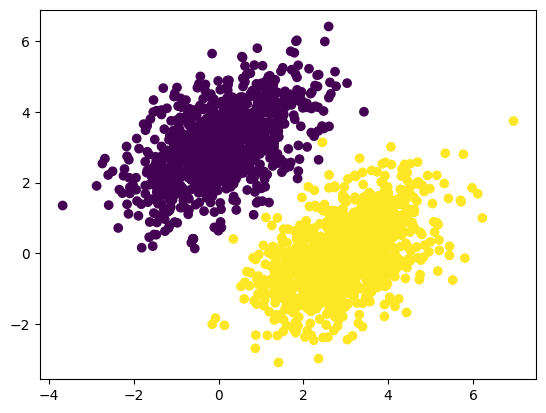

In [114]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Untuk *input* dua dimensi dan klasifikasi biner, kita perlu *perceptron* dengan dua *neuron* di *input layer* dan satu *neuron* di *output layer*. Sebelum proses *training* dimulai, nilai matriks $W$ dan vektor kolom $b$ diisi secara *random* terlebih dahulu.

In [115]:
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.normal(shape = (input_dim, output_dim)))
b = tf.Variable(tf.random.normal(shape = (output_dim,)))

In [116]:
# forward pass
def model(inputs):
    return tf.sigmoid(
        tf.matmul(inputs, W) + b
    )

In [117]:
# cross entropy loss
def entropy_loss(y, yhat):
    per_sample_losses = - y * tf.math.log(yhat) - (1-y) * tf.math.log(1-yhat)
    return tf.reduce_mean(per_sample_losses)

In [118]:
# training loop
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = entropy_loss(targets, predictions)
        grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
        W.assign_sub(learning_rate * grad_loss_wrt_W)
        b.assign_sub(learning_rate * grad_loss_wrt_b)
        return loss

In [119]:
# training loop/process/epoch
for epoch in range(100):
    loss = training_step(inputs, targets)
    print(f"Loss at epoch {epoch}: {loss}")

Loss at epoch 0: 0.6356502771377563
Loss at epoch 1: 0.5394761562347412
Loss at epoch 2: 0.4659949839115143
Loss at epoch 3: 0.4092557430267334
Loss at epoch 4: 0.3647000789642334
Loss at epoch 5: 0.32904741168022156
Loss at epoch 6: 0.29999035596847534
Loss at epoch 7: 0.2759065628051758
Loss at epoch 8: 0.25564298033714294
Loss at epoch 9: 0.23836685717105865
Loss at epoch 10: 0.22346581518650055
Loss at epoch 11: 0.21048182249069214
Loss at epoch 12: 0.19906604290008545
Loss at epoch 13: 0.18894900381565094
Loss at epoch 14: 0.17991921305656433
Loss at epoch 15: 0.171808660030365
Loss at epoch 16: 0.16448216140270233
Loss at epoch 17: 0.1578298956155777
Loss at epoch 18: 0.15176154673099518
Loss at epoch 19: 0.14620234072208405
Loss at epoch 20: 0.1410897672176361
Loss at epoch 21: 0.1363711655139923


Loss at epoch 22: 0.13200189173221588
Loss at epoch 23: 0.12794384360313416
Loss at epoch 24: 0.12416423857212067
Loss at epoch 25: 0.12063482403755188
Loss at epoch 26: 0.11733102053403854
Loss at epoch 27: 0.11423142999410629
Loss at epoch 28: 0.11131726205348969
Loss at epoch 29: 0.10857197642326355
Loss at epoch 30: 0.10598097741603851
Loss at epoch 31: 0.10353130847215652
Loss at epoch 32: 0.10121144354343414
Loss at epoch 33: 0.09901105612516403
Loss at epoch 34: 0.09692094475030899
Loss at epoch 35: 0.09493280202150345
Loss at epoch 36: 0.0930391252040863
Loss at epoch 37: 0.09123318642377853
Loss at epoch 38: 0.08950886130332947
Loss at epoch 39: 0.08786056190729141
Loss at epoch 40: 0.08628326654434204
Loss at epoch 41: 0.08477234095335007
Loss at epoch 42: 0.08332355320453644
Loss at epoch 43: 0.08193304389715195
Loss at epoch 44: 0.08059726655483246
Loss at epoch 45: 0.07931295037269592
Loss at epoch 46: 0.07807708531618118
Loss at epoch 47: 0.07688692212104797
Loss at epoch

tf.Tensor(
[[0.0227507 ]
 [0.00890069]
 [0.01428704]
 ...
 [0.87311286]
 [0.97183764]
 [0.98756224]], shape=(2000, 1), dtype=float32)


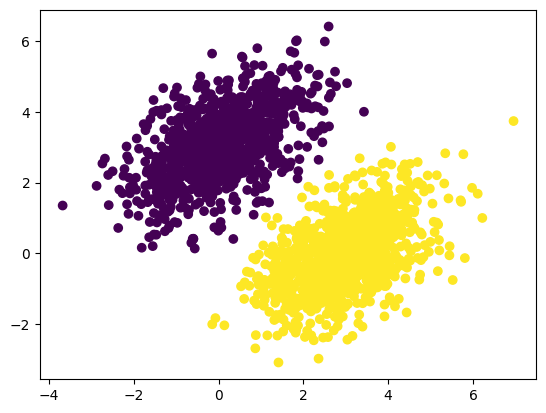

In [123]:
predictions = model(inputs)
print(predictions)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## Keras

In [ ]:
from tensorflow import keras

In [122]:
print(inputs.shape)
print(targets.shape)

(2000, 2)
(2000, 1)


### *Sequential API*

In [124]:
model2 = keras.Sequential([
    keras.layers.InputLayer(input_shape = (2,)),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [143]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
keras.utils.plot_model(
    model2,
    show_shapes = True,
    to_file = "model2.png"
)

![](./modul7_model2.png)

Untuk memilih *hyperparameter* yaitu *optimizer* dan *loss function*, kedua kode berikut ini ekuivalen:

In [129]:
model2.compile(optimizer="sgd",
              loss="sparse_binary_crossentropy",
              metrics=["accuracy"])

In [130]:
model2.compile(optimizer=keras.optimizers.SGD(),
               loss=keras.losses.BinaryCrossentropy(),
               metrics=[keras.metrics.BinaryAccuracy()])

Selanjutnya, tinggal *training*

In [132]:
x_train = inputs
y_train = targets
history2 = model2.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 2s 10ms/step - loss: 0.2617 - binary_accuracy: 0.9994 - val_loss: 0.2296 - val_binary_accuracy: 0.9950
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 0.1873 - binary_accuracy: 1.0000 - val_loss: 0.1960 - val_binary_accuracy: 0.9925
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1493 - binary_accuracy: 0.9994 - val_loss: 0.1707 - val_binary_accuracy: 0.9925
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 0.1256 - binary_accuracy: 0.9994 - val_loss: 0.1515 - val_binary_accuracy: 0.9925
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1092 - binary_accuracy: 0.9994 - val_loss: 0.1365 - val_binary_accuracy: 0.9925
Epoch 6/100
50/50 [==============================] - 0s 10ms/step - loss: 0.0971 - binary_accuracy: 0.9994 - val_loss: 0.1246 - val_binary_accuracy: 0.9925
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - l

In [135]:
print(history2.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


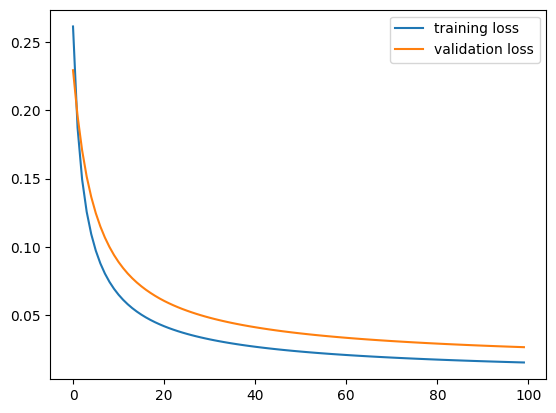

In [136]:
plt.plot(history2.history['loss'], label = 'training loss')
plt.plot(history2.history['val_loss'], label = 'validation loss')
plt.legend()

### *Functional API*

In [138]:
x_sym = keras.Input(shape = (2,))

In [140]:
dense_func = keras.layers.Dense(1, activation = 'sigmoid')
y_sym = dense_func(x_sym)

In [141]:
model3 = keras.Model(inputs=x_sym, outputs=y_sym)

In [142]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
keras.utils.plot_model(
    model3,
    show_shapes = True,
    to_file = "model3.png"
)

![](./modul7_model3.png)

Sisanya (*compile* lalu *fit*) sama dengan Sequential API

### *Subclassing API* (yaitu dengan OOP)

In [ ]:
class Linear(keras.layers.Layer):
    def __init__(self, units=1, input_dim=2):
        super().__init__()
        self.W = self.add_weight(
            shape=(input_dim, units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(units,),
            initializer="random_normal",
            trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.W) + self.b

## Referensi

Sumber gambar

- Aggarwal, C. Charu. 2018. *Neural Networks and Deep Learning: A Textbook.* Edisi Pertama. Springer.

- Goodfellow, Ian; Bengio, Yoshua; & Courville, Aaron. 2016. *Deep Learning*. MIT Press.

Buku lainnya

- Géron, Aurélien. 2019. *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.* Edisi Kedua. O'Reilly Media.

Internet

- <https://www.tensorflow.org/api_docs/python/tf>

- <https://keras.io/api/models/>